# Cause of death Data Analysis Project
In this notebook, we will analyze a dataset of Cause of death for some different countries to extract insights and visualize key patterns.

## 1. Importing Libraries and Loading the Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
df = pd.read_csv("cause_of_death.csv")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

## 2. Data Cleaning

In [3]:
# Displaying general info about the dataset to identify any missing values, data types, and potential anomalies
df.info()

# Checking for missing values in the dataset
missing_values = df.isnull().sum()

# Displaying statistics for numerical columns to identify anomalies (e.g., very high or very low values)
summary_statistics = df.describe()

missing_values, summary_statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

(Country/Territory                             0
 Code                                          0
 Year                                          0
 Meningitis                                    0
 Alzheimer's Disease and Other Dementias       0
 Parkinson's Disease                           0
 Nutritional Deficiencies                      0
 Malaria                                       0
 Drowning                                      0
 Interpersonal Violence                        0
 Maternal Disorders                            0
 HIV/AIDS                                      0
 Drug Use Disorders                            0
 Tuberculosis                                  0
 Cardiovascular Diseases                       0
 Lower Respiratory Infections                  0
 Neonatal Disorders                            0
 Alcohol Use Disorders                         0
 Self-harm                                     0
 Exposure to Forces of Nature                  0
 Diarrheal Diseases 

In [4]:
# Ensure all values are non-negative (apply to numeric columns)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.clip(lower=0))

# Find How many countries on this data?
num_to_find = list(range(1990,2019,+1))
c_n = "Year"
count = df[c_n].value_counts()[num_to_find]
print(count)
print("So, we have 204 countries")

Year
1990    204
1991    204
1992    204
1993    204
1994    204
1995    204
1996    204
1997    204
1998    204
1999    204
2000    204
2001    204
2002    204
2003    204
2004    204
2005    204
2006    204
2007    204
2008    204
2009    204
2010    204
2011    204
2012    204
2013    204
2014    204
2015    204
2016    204
2017    204
2018    204
Name: count, dtype: int64
So, we have 204 countries


In [5]:
# Creating a new column for total deaths by summing all cause-related columns
cause_columns = df.columns[3:]  # Exclude Country/Territory, Code, and Year
df['Total_Deaths'] = df[cause_columns].sum(axis=1)

# Calculate Z-scores for the 'Total_Deaths' column
df['zscore_total_deaths'] = stats.zscore(df['Total_Deaths'])

# Identify rows with Z-scores greater than 3 or less than -3 (potential outliers)
outliers = df[(df['zscore_total_deaths'] > 3) | (df['zscore_total_deaths'] < -3)]

# Display outliers and dataset with the new column for further analysis
df[['Country/Territory', 'Year', 'Total_Deaths', 'zscore_total_deaths']].head(), outliers


(  Country/Territory  Year  Total_Deaths  zscore_total_deaths
 0       Afghanistan  1990        147971            -0.105215
 1       Afghanistan  1991        156844            -0.095059
 2       Afghanistan  1992        169156            -0.080966
 3       Afghanistan  1993        182230            -0.066001
 4       Afghanistan  1994        194795            -0.051619,
      Country/Territory Code  Year  Meningitis  \
 1110             China  CHN  2007        8407   
 1111             China  CHN  2008        8384   
 1112             China  CHN  2009        8394   
 1113             China  CHN  2010        8341   
 1114             China  CHN  2011        8193   
 1115             China  CHN  2012        8057   
 1116             China  CHN  2013        7971   
 1117             China  CHN  2014        7740   
 1118             China  CHN  2015        7553   
 1119             China  CHN  2016        7550   
 1120             China  CHN  1990       37473   
 1121             China  CH

In [6]:
# Count the number of zeros in each cause of death column
zero_counts = (df[cause_columns] == 0).sum()

# Display causes with a significant number of zeros
zero_counts[zero_counts > 0]

Meningitis                                     316
Alzheimer's Disease and Other Dementias         78
Parkinson's Disease                             90
Nutritional Deficiencies                       283
Malaria                                       3431
Drowning                                       120
Interpersonal Violence                         165
Maternal Disorders                             426
HIV/AIDS                                       235
Drug Use Disorders                             580
Tuberculosis                                   196
Lower Respiratory Infections                     6
Neonatal Disorders                              91
Alcohol Use Disorders                          279
Self-harm                                       60
Exposure to Forces of Nature                  3418
Diarrheal Diseases                             159
Environmental Heat and Cold Exposure           841
Conflict and Terrorism                        3208
Chronic Kidney Disease         

In [7]:
# Inspect rows with zeros for a particular cause
zero_cases = df[df['Acute Hepatitis'] == 0]

# Display rows where 'Acute Hepatitis' has a zero value
zero_cases.head()


,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Total_Deaths,zscore_total_deaths
90,American Samoa,ASM,1990,1,3,1,2,0,4,3,...,0,2,5,17,5,9,0,0,204,-0.274354
91,American Samoa,ASM,1991,1,3,2,2,0,4,3,...,0,2,6,17,5,9,0,0,212,-0.274345
92,American Samoa,ASM,1992,1,3,2,2,0,4,3,...,0,2,6,18,5,9,0,0,219,-0.274337
93,American Samoa,ASM,1993,1,3,2,2,0,4,4,...,0,2,6,18,5,10,0,0,226,-0.274329
94,American Samoa,ASM,1994,1,3,2,2,0,4,4,...,0,2,6,18,5,10,0,0,230,-0.274324


In [8]:
# Loop through all cause columns and calculate the percentage of each cause compared to the total deaths
for cause in cause_columns:
    df[f'{cause}_Percentage'] = (df[cause] / df['Total_Deaths']) * 100

# Display the first few rows with the new percentage columns added
df[[f'{cause}_Percentage' for cause in cause_columns]].head()


,Meningitis_Percentage,Alzheimer's Disease and Other Dementias_Percentage,Parkinson's Disease_Percentage,Nutritional Deficiencies_Percentage,Malaria_Percentage,Drowning_Percentage,Interpersonal Violence_Percentage,Maternal Disorders_Percentage,HIV/AIDS_Percentage,Drug Use Disorders_Percentage,...,Diabetes Mellitus_Percentage,Chronic Kidney Disease_Percentage,Poisonings_Percentage,Protein-Energy Malnutrition_Percentage,Road Injuries_Percentage,Chronic Respiratory Diseases_Percentage,Cirrhosis and Other Chronic Liver Diseases_Percentage,Digestive Diseases_Percentage,"Fire, Heat, and Hot Substances_Percentage",Acute Hepatitis_Percentage
0,1.459070,0.754202,0.250725,1.410411,0.062850,0.925857,1.039393,1.794270,0.022977,0.062850,...,1.424603,2.506572,0.228423,1.388110,2.807307,4.017679,1.806435,3.382420,0.218286,2.017287
1,1.414144,0.724287,0.238453,1.372702,0.120502,0.886868,1.275790,1.839407,0.026141,0.065033,...,1.351662,2.374334,0.223789,1.351024,2.851241,3.857336,1.739308,3.264390,0.211675,1.971386
2,1.463146,0.686940,0.223462,1.443047,0.141290,0.895032,1.359100,1.959729,0.028376,0.069758,...,1.272790,2.232259,0.228192,1.421173,3.018515,3.678853,1.673012,3.153893,0.212821,1.965641
3,1.543105,0.651375,0.210723,1.556824,0.059266,0.925753,1.420732,2.014487,0.030730,0.072436,...,1.204522,2.119300,0.233222,1.534874,3.117489,3.536739,1.614992,3.055479,0.217308,1.976074
4,1.553941,0.621679,0.200724,1.581663,0.108319,0.928669,1.462563,1.983110,0.032342,0.072897,...,1.145307,2.018532,0.231525,1.559588,3.080675,3.421032,1.553941,2.946174,0.215611,1.958983


# 3. Exploratory Data Analysis (EDA)
## Key Questions and Relationships
### What is top causes of death globally?

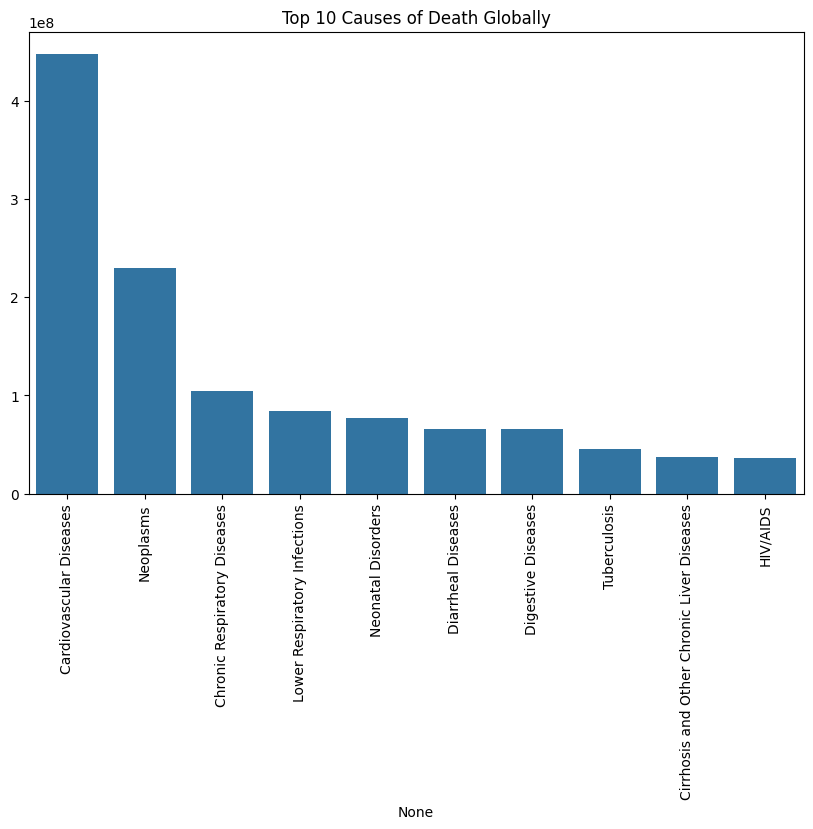

In [9]:
# Top causes of death globally
global_causes = df[numeric_columns].sum().sort_values(ascending=False)

# Visualize top 10 causes of death
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=global_causes.index[:10], y=global_causes.values[:10])
plt.xticks(rotation=90)
plt.title('Top 10 Causes of Death Globally')
plt.show()


### Q.1) What are the leading causes of death globally and regionally?

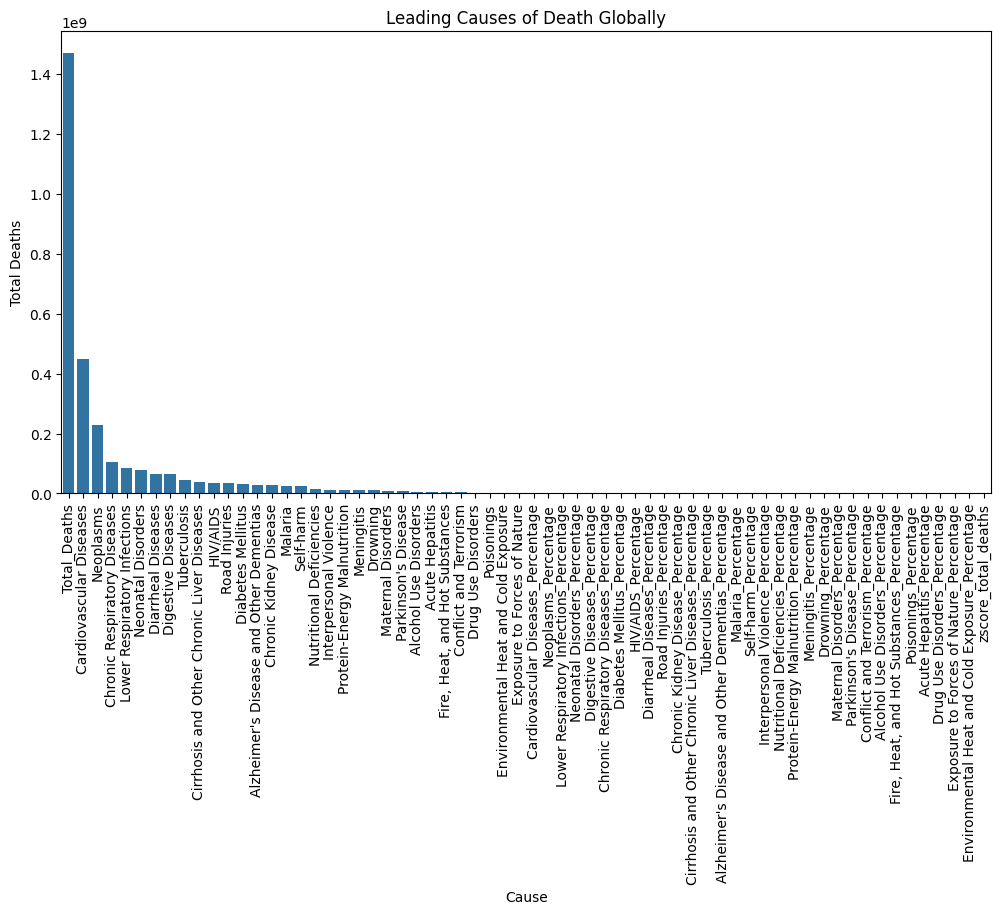

In [10]:
# Melt the dataframe to have 'Cause' as a single column
melted_df = df.melt(id_vars=['Country/Territory', 'Year'], 
                     value_vars=df.columns[3:], 
                     var_name='Cause', 
                     value_name='Deaths')

# Group by cause and sum deaths
global_causes = melted_df.groupby('Cause')['Deaths'].sum().sort_values(ascending=False)

# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(x=global_causes.index, y=global_causes.values)
plt.xticks(rotation=90)
plt.title('Leading Causes of Death Globally')
plt.ylabel('Total Deaths')
plt.show()


### Which regions or countries have the highest mortality rates?

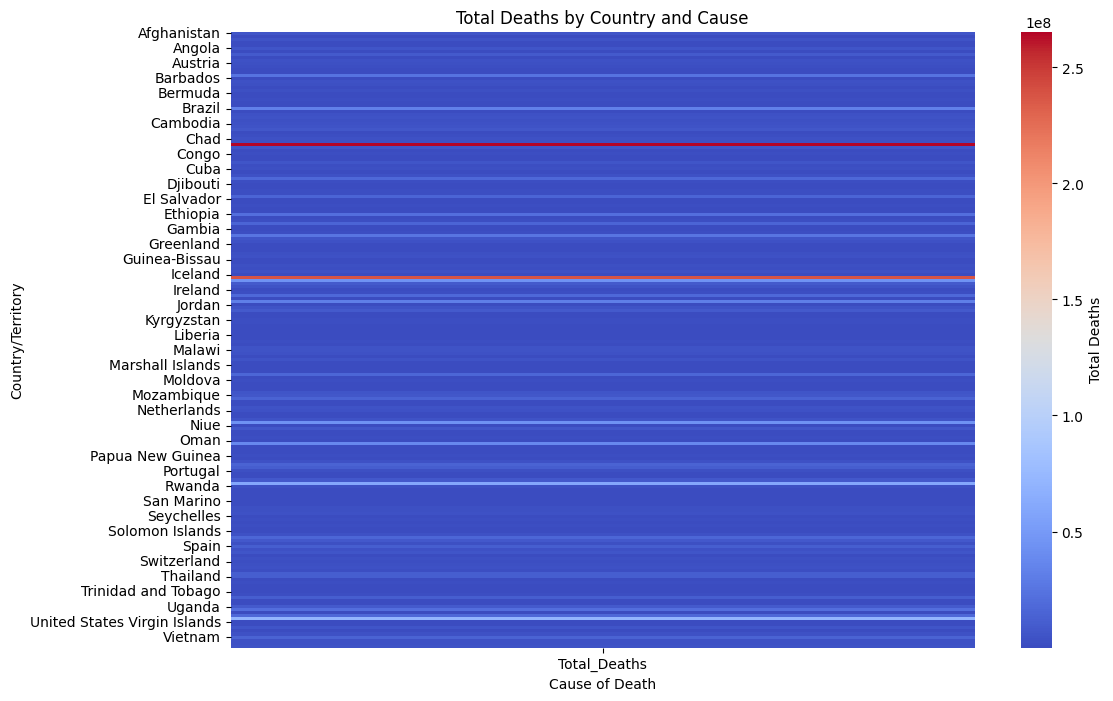

In [11]:
# Pivoting data for heatmap by country and cause
cause_deaths_pivot = df.pivot_table(values='Total_Deaths', index='Country/Territory', aggfunc='sum')

# Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(cause_deaths_pivot, cmap="coolwarm", cbar_kws={'label': 'Total Deaths'})
plt.title('Total Deaths by Country and Cause')
plt.xlabel('Cause of Death')
plt.ylabel('Country/Territory')
plt.show()


###  How have global mortality trends evolved over the past few decades?

<Figure size 1000x600 with 0 Axes>

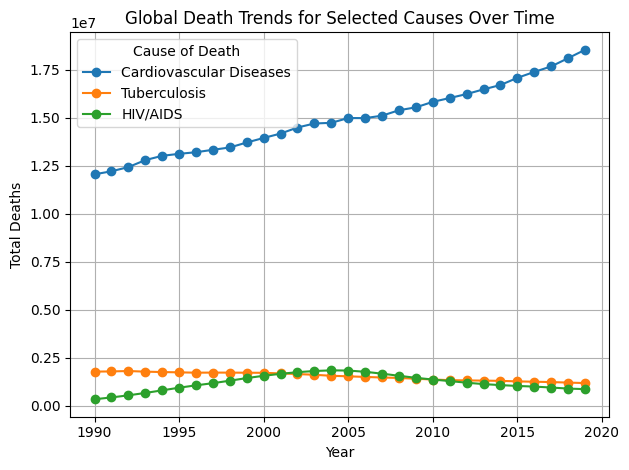

In [12]:
# Grouping data by year and summing the deaths for selected causes
trend_data = df.groupby('Year')[['Cardiovascular Diseases', 'Tuberculosis', 'HIV/AIDS']].sum()

# Line plot for trends over time
plt.figure(figsize=(10, 6))
trend_data.plot(kind='line', marker='o')
plt.title('Global Death Trends for Selected Causes Over Time')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.legend(title='Cause of Death')
plt.grid(True)
plt.tight_layout()
plt.show()


### Correlations Between Different Causes of Death

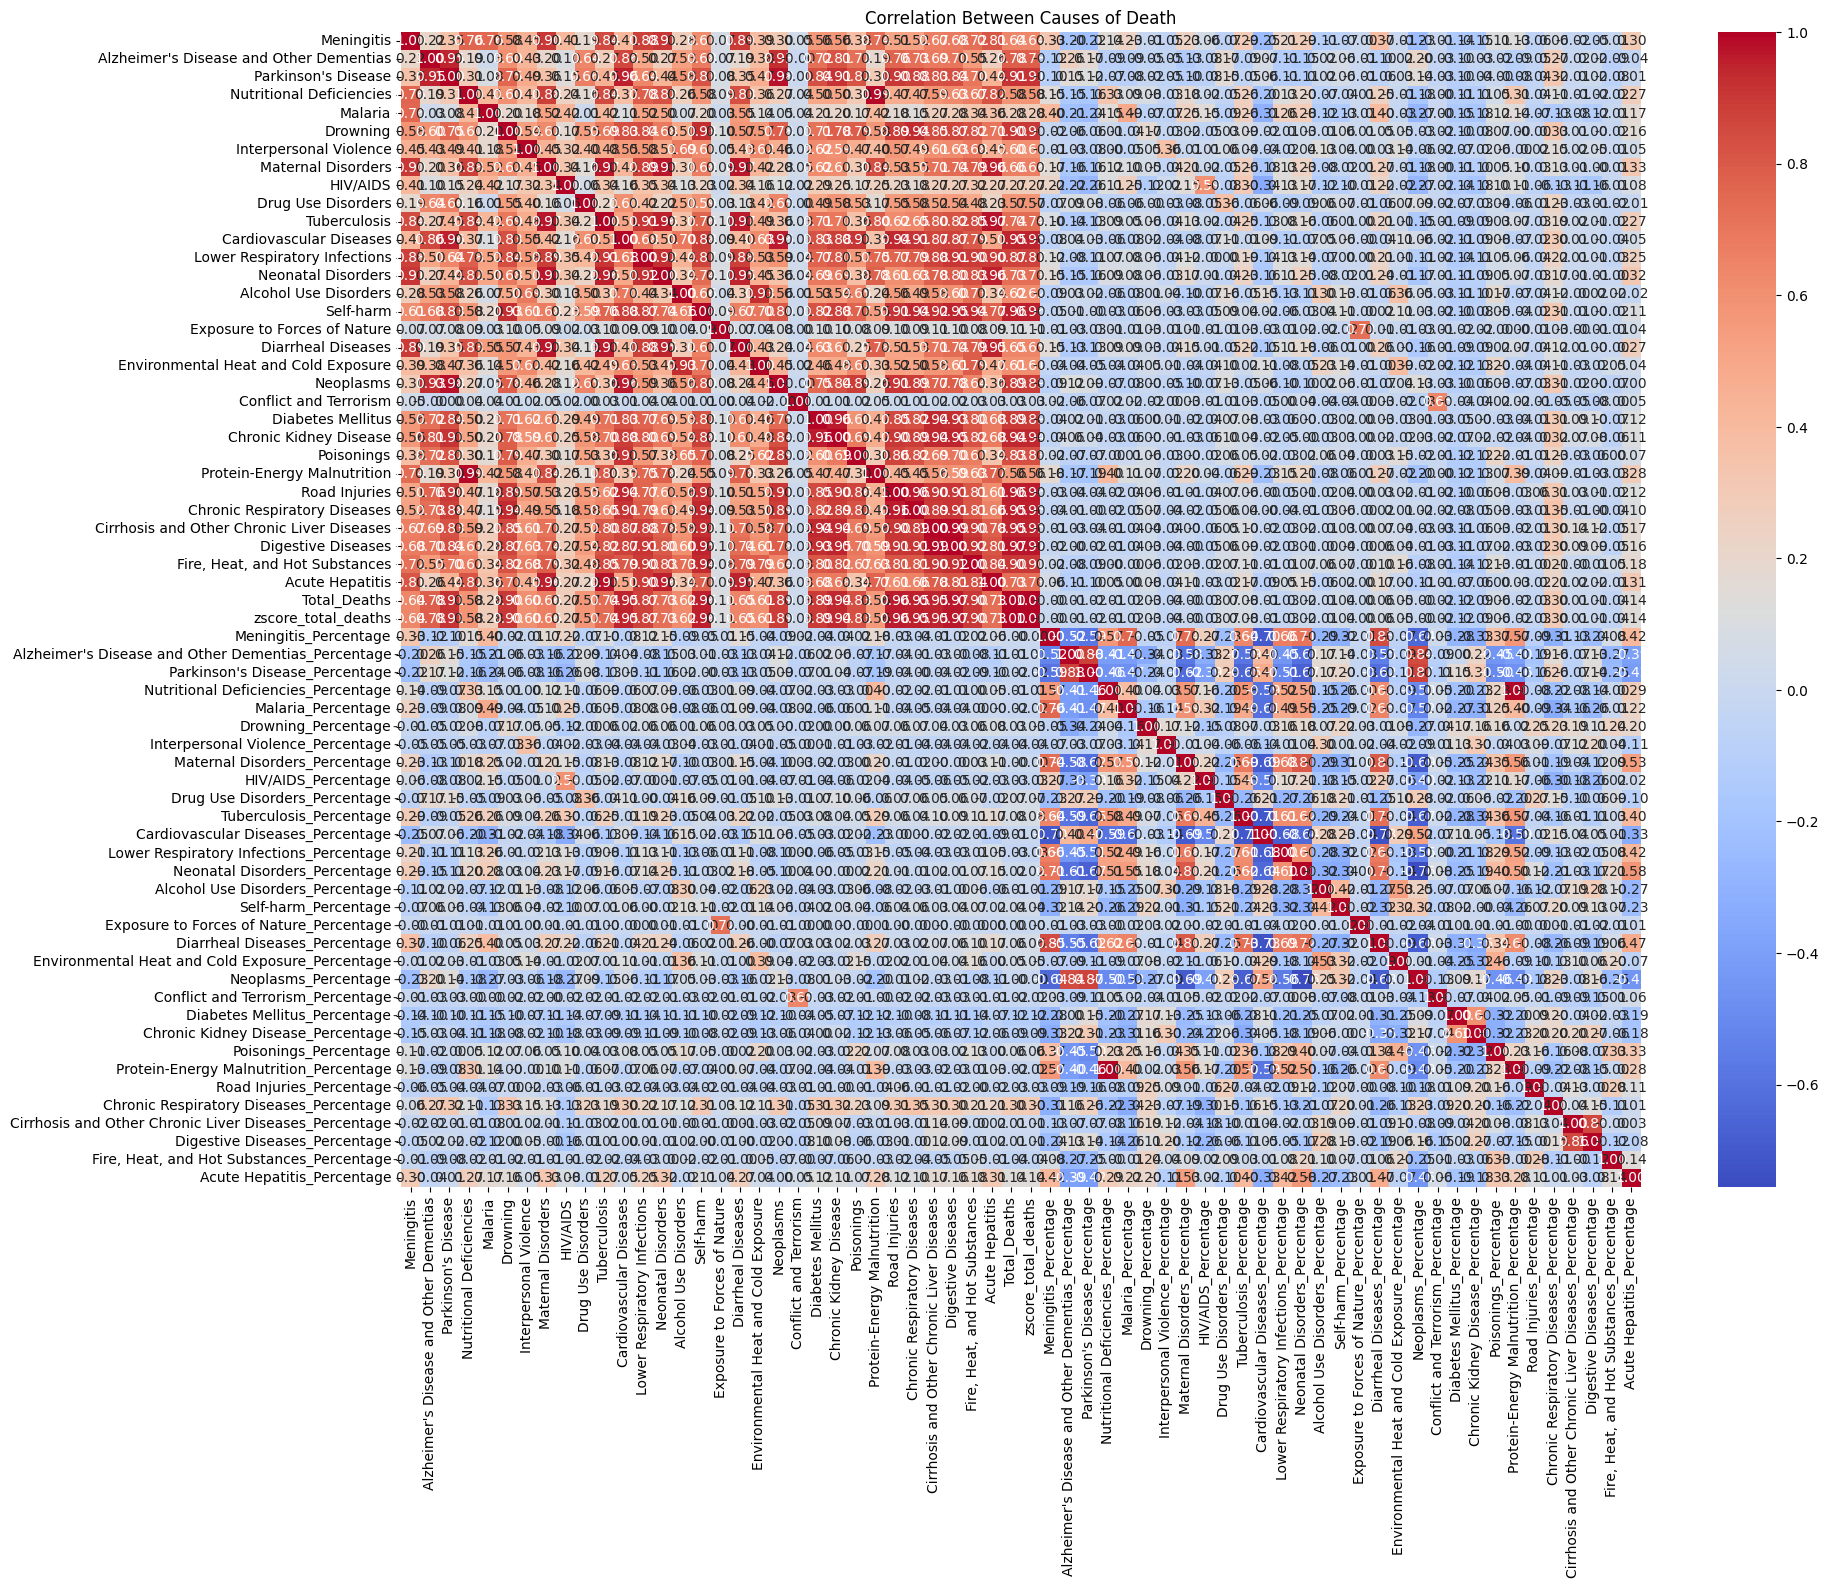

In [13]:
# Create a correlation matrix
correlation_matrix = df.iloc[:, 3:].corr()

# Visualize with a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Between Causes of Death')
plt.show()

### Which causes of death have the most variation as a percentage of total deaths across countries?

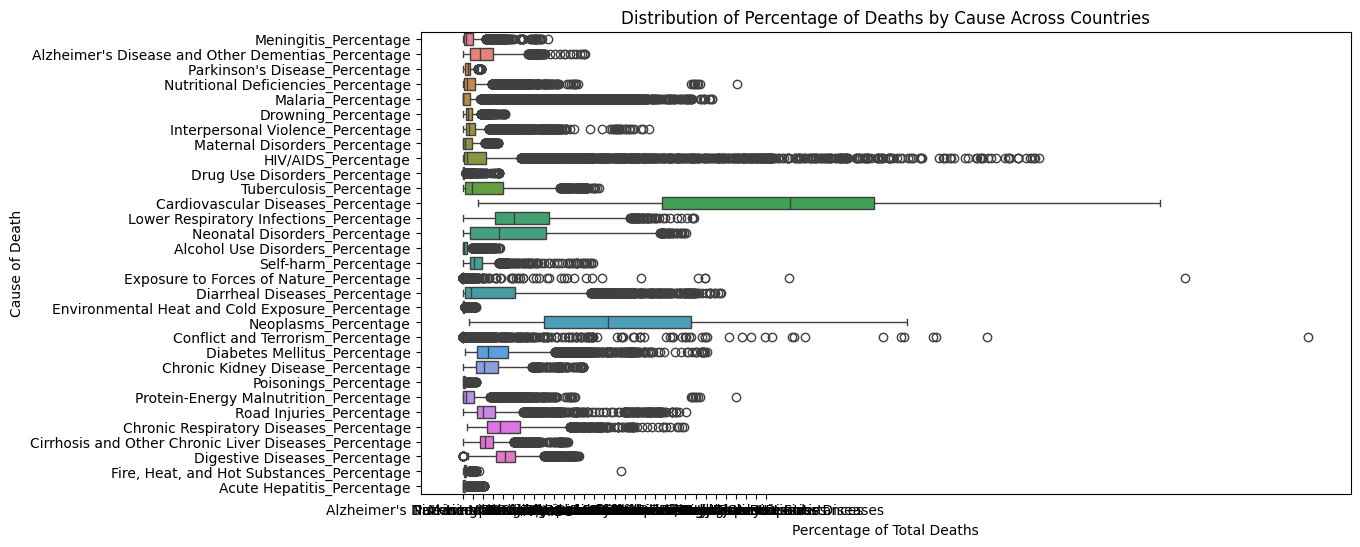

In [14]:
# Creating a boxplot for the percentage of deaths by cause
plt.figure(figsize=(12, 6))
sns.boxplot(data=[df[f'{cause}_Percentage'] for cause in cause_columns], orient='h')
plt.title("Distribution of Percentage of Deaths by Cause Across Countries")
plt.xlabel('Percentage of Total Deaths')
plt.ylabel('Cause of Death')
plt.xticks(ticks=range(len(cause_columns)), labels=cause_columns)
plt.show()


### Comparing multiple causes of death over time

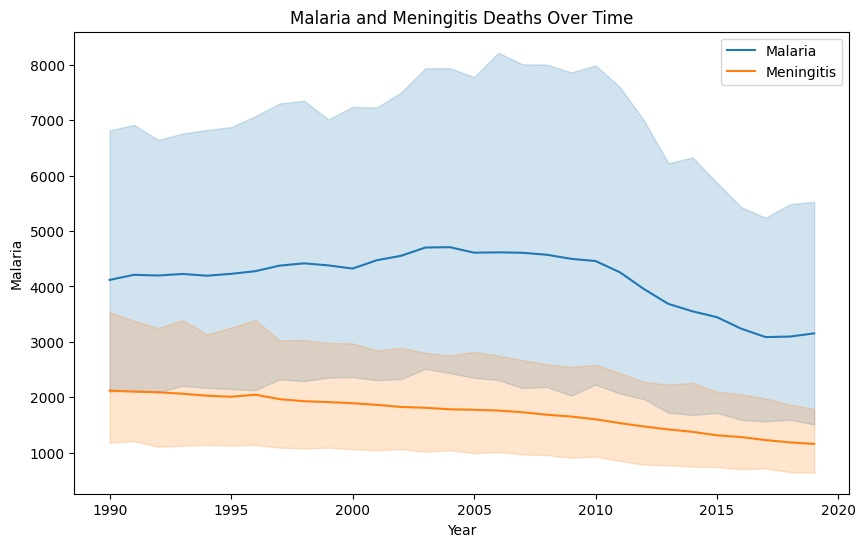

In [15]:
# Time series of Malaria and Meningitis deaths
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Malaria', data=df, label='Malaria')
sns.lineplot(x='Year', y='Meningitis', data=df, label='Meningitis')
plt.title('Malaria and Meningitis Deaths Over Time')
plt.legend()
plt.show()


### What percentage of total deaths are attributed to each cause globally?

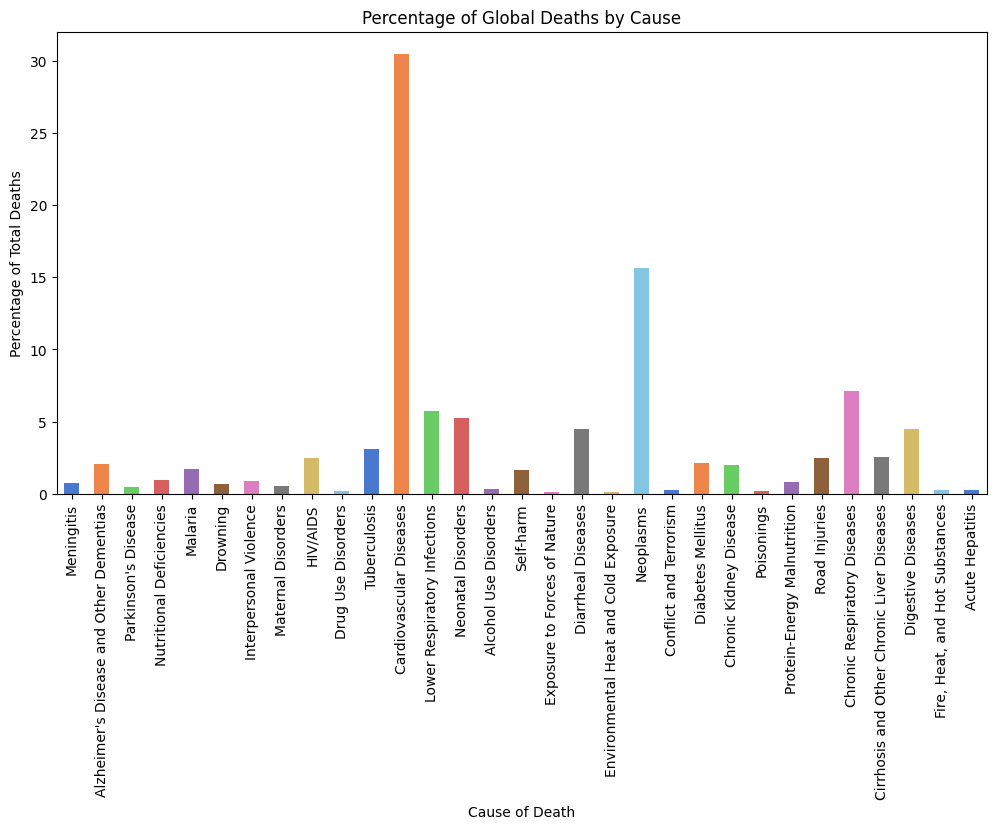

In [16]:
# Calculate the global percentage for each cause of death
global_cause_percentages = df[cause_columns].sum() / df['Total_Deaths'].sum() * 100

# Stacked bar chart
plt.figure(figsize=(12, 6))
global_cause_percentages.plot(kind='bar', stacked=True, color=sns.color_palette('muted'))
plt.title('Percentage of Global Deaths by Cause')
plt.ylabel('Percentage of Total Deaths')
plt.xlabel('Cause of Death')
plt.xticks(rotation=90)
plt.show()


###  What are the top causes of death in different continents?

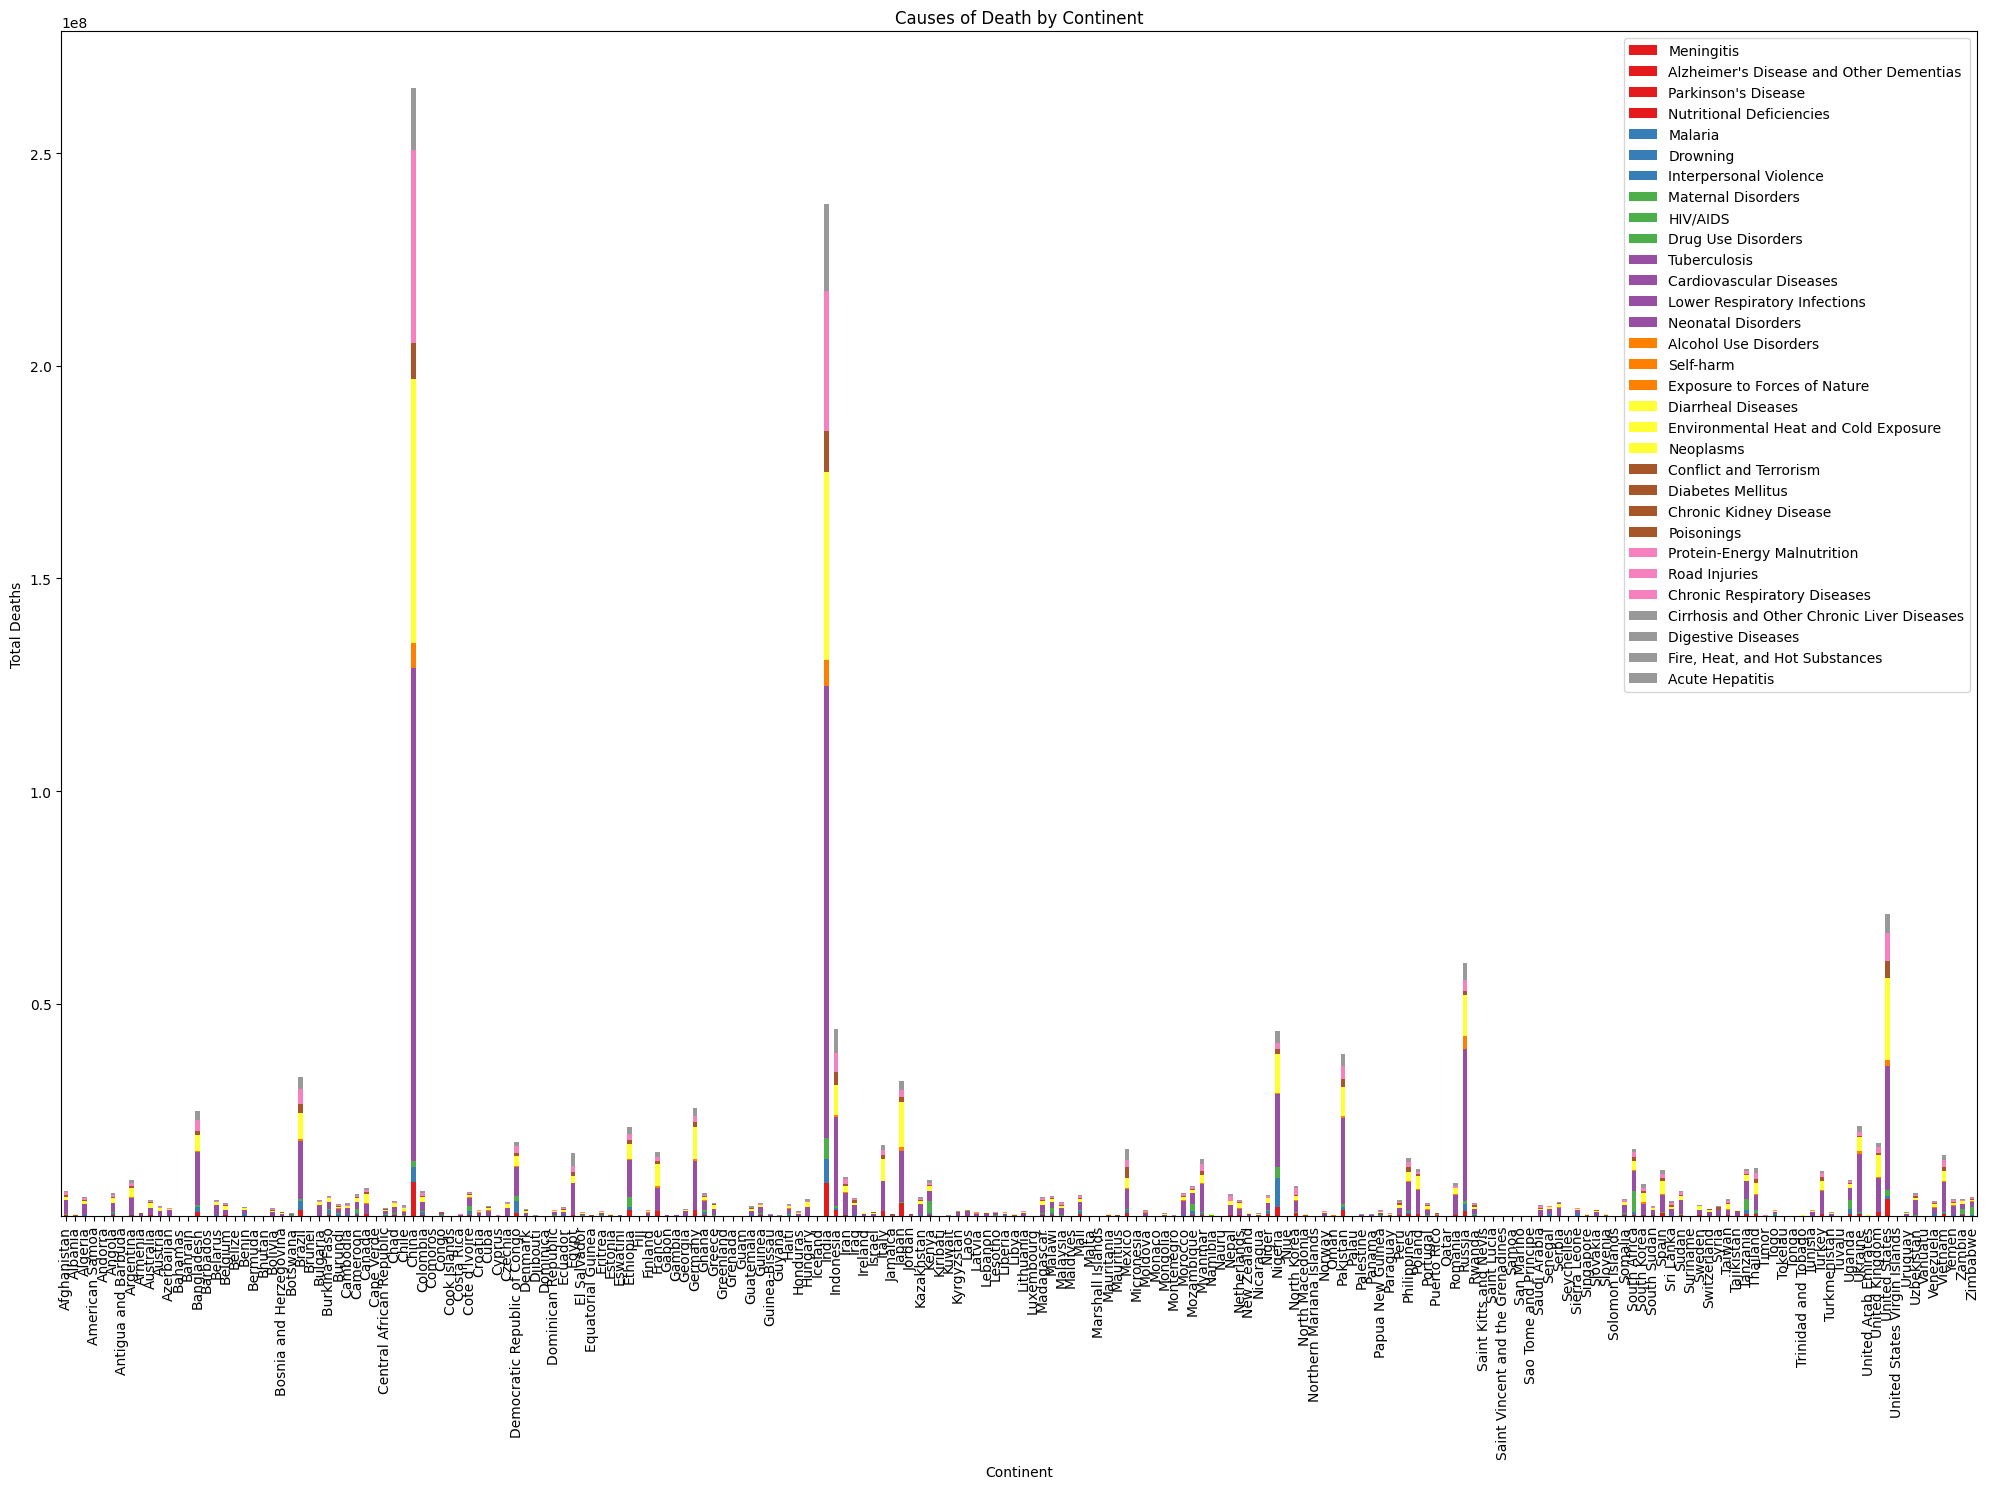

In [17]:
# Grouping data by continent and summing the causes of death
continent_death_distribution = df.groupby('Country/Territory')[cause_columns].sum()

# Stacked bar chart
continent_death_distribution.plot(kind='bar', stacked=True, figsize=(20, 15), colormap='Set1')
plt.title('Causes of Death by Continent')
plt.ylabel('Total Deaths')
plt.xlabel('Continent')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Can we predict future trends of certain diseases?
### Basic Prediction Model for Meningitis Deaths

In [ ]:
from sklearn.linear_model import LinearRegression

# Preparing data for prediction
df_yearly = df.groupby('Year').sum().reset_index()
X = df_yearly[['Year']]
y = df_yearly['Meningitis']

# Train a simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future deaths for upcoming years
future_years = pd.DataFrame({'Year': range(2020, 2031)})
predictions = model.predict(future_years)

# Visualize the prediction
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_yearly['Year'], y=df_yearly['Meningitis'], label='Actual Data')
plt.plot(future_years['Year'], predictions, label='Predicted Data', linestyle='--', color='red')
plt.title('Meningitis Deaths: Actual vs Predicted')
plt.legend()
plt.show()
